<a name="1"></a>
# 1 - Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv('D:\Wind Prediction Project\T1.csv')
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
#There is negative values in the actual power column
count_negative_values = (df['LV ActivePower (kW)'] < 0).sum()
count_negative_values

57

In [7]:
df.loc[df['LV ActivePower (kW)'] < 0, 'LV ActivePower (kW)'] = 0

<a name="2"></a>
# 2 - Feature Extraction

### Extract new features from the Date/Time Column

In [8]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')

In [9]:
df['Week']=(df['Date/Time'] - df['Date/Time'].dt.to_period('M').dt.to_timestamp()).dt.days // 7 + 1
filter=df['Week'].loc[df['Week']==5]
filter=filter-1
df['Week'].update(filter)
df['Week'].value_counts()

Week
4    15285
3    12035
1    11652
2    11558
Name: count, dtype: int64

In [10]:
df['Month']=df['Date/Time'].dt.month

In [11]:
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Winter', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df['Seasons'] = df['Month'].map(seasons_dict)

In [12]:
df['Day']=df['Date/Time'].dt.day

In [13]:
df['Hour']=df['Date/Time'].dt.hour+1

In [14]:
df.drop(columns=['Date/Time'],inplace=True)

In [15]:
df.isna().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Week                             0
Month                            0
Seasons                          0
Day                              0
Hour                             0
dtype: int64

### Split The Data

In [16]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

<a name="3"></a>
# 3 - EDA

In [17]:
#Intialize Numerical and Date Columns
date_col=['Week','Month','Seasons','Hour','Day']
num_col=['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)',]


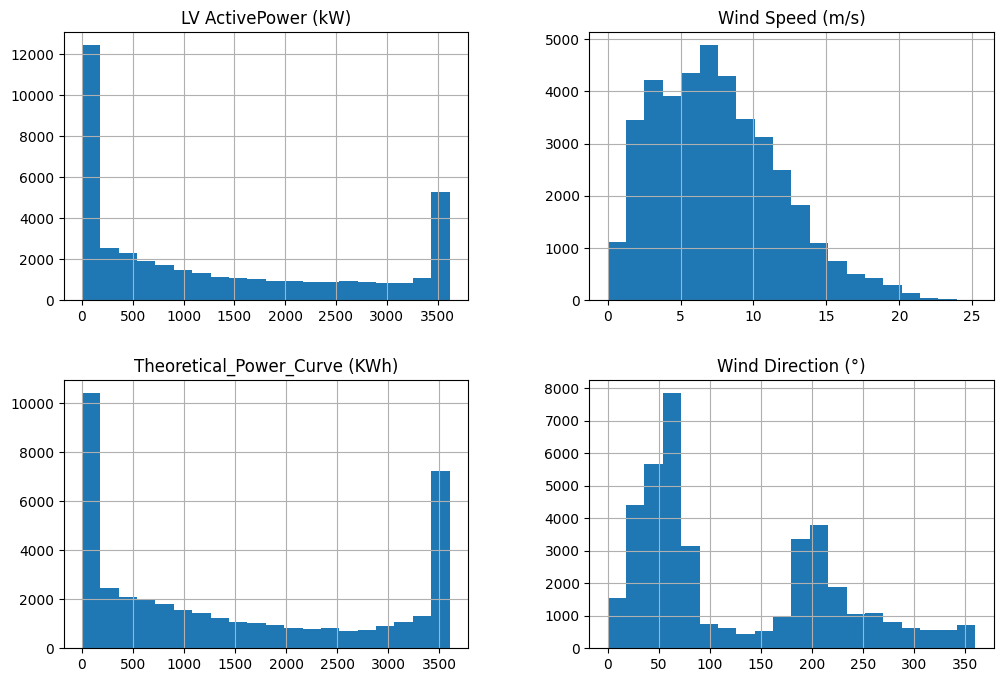

In [18]:
df_train[num_col].hist(bins=20,figsize=(12,8));

<a name="3.1"></a>
### 3.1 - Scatter matrix

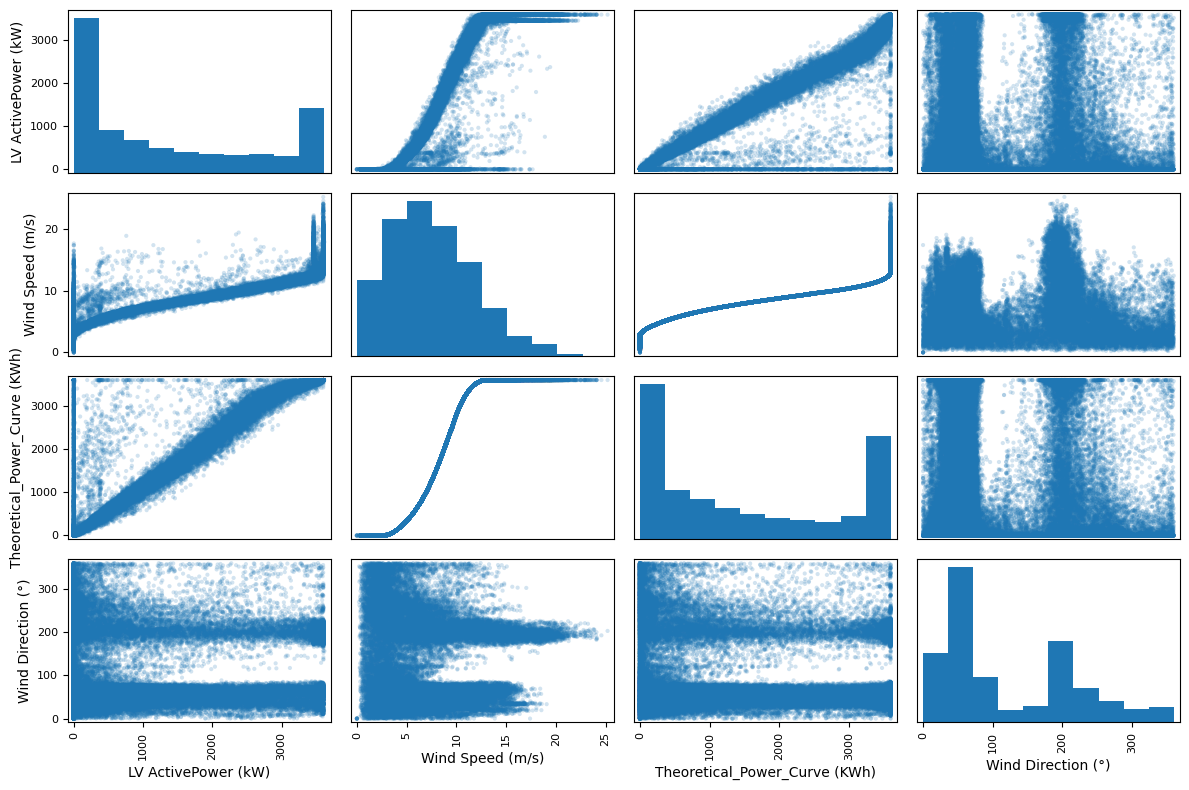

In [19]:
pd.plotting.scatter_matrix(df[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

- **Comments:**
    - from the scatter plot between `wind speed` and `Theoritical Power Curve`, we see that Wind Turbines Systems can't generate any power if the wind speed is less than 4 m/s
    - when the wind speed is larger than 4 m/s to 11 m/s, the relation between them are linear meaning that increasing the wind speed, allows turbines to generate more power
    - after the wind speed passes 11 m/s, the power generated is saturated on 3600 KWh

<a name="3.2"></a>
### 3.2 - Univariate Analysis

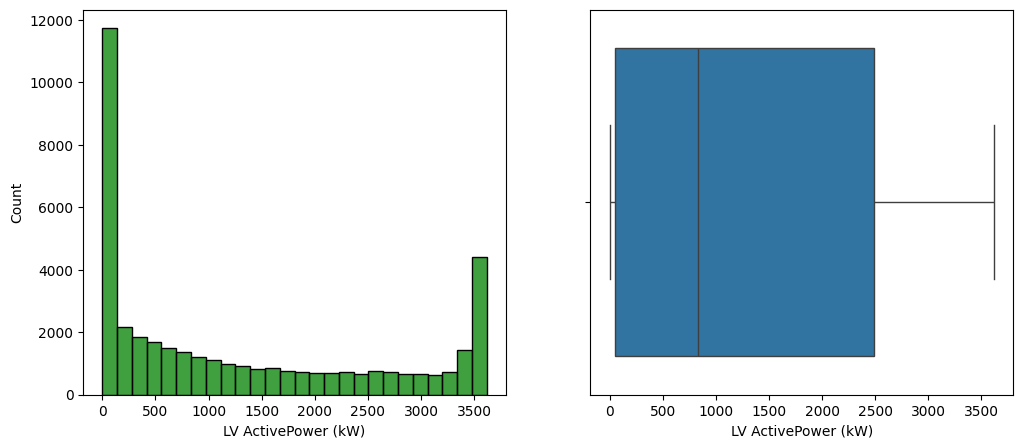

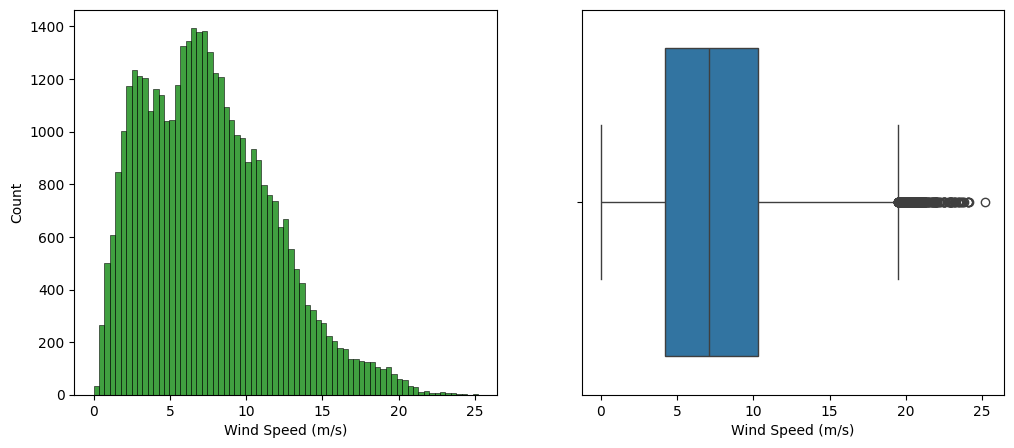

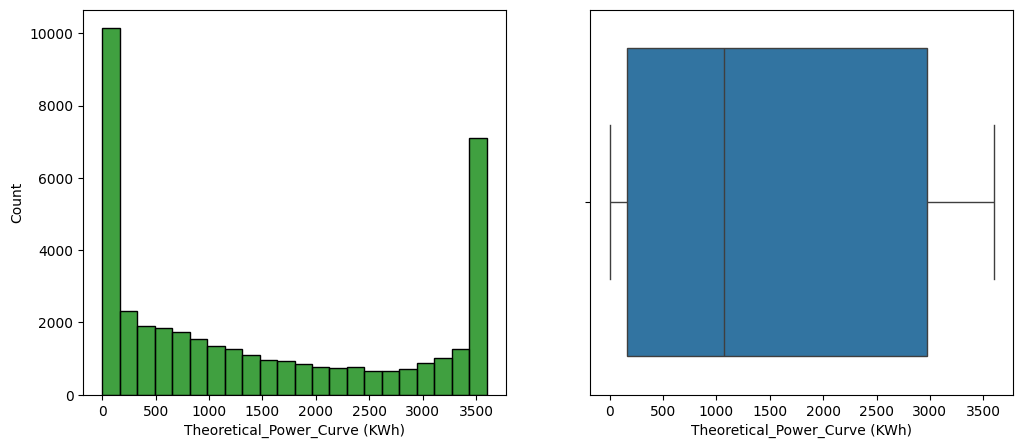

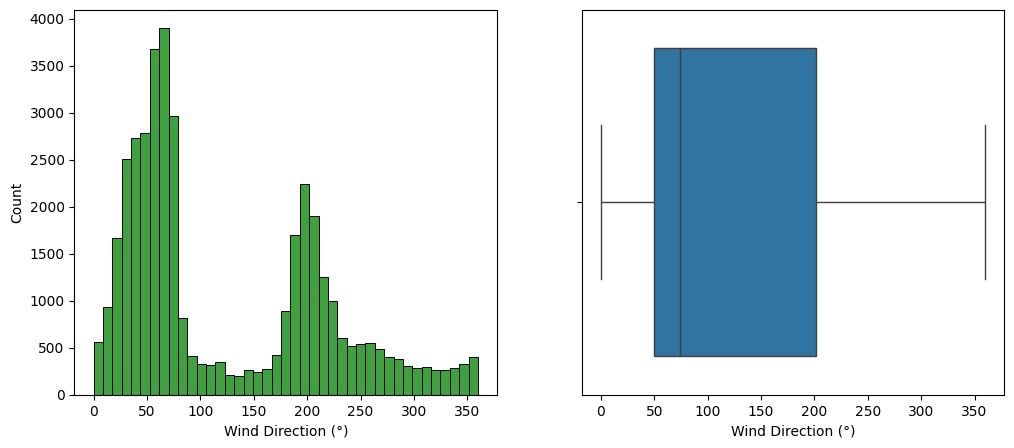

In [20]:
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df_train[col], ax=ax[0] ,color='green')  
    sns.boxplot(x=df_train[col], ax=ax[1])
    plt.show()

<a name="3.3"></a>
### 3.3 - Plotting Colinearity

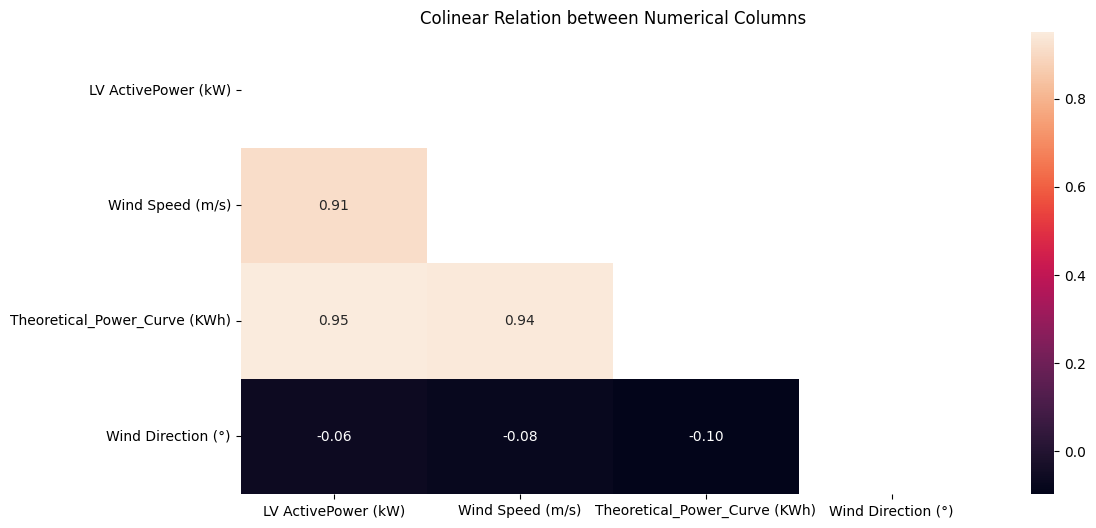

In [21]:
corr = df_train[num_col].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.show()

<a name="3.4"></a>
## 3.4 - Numerical Columns over the date columns

<h3>Numerical Columns over the Weeks<h3>

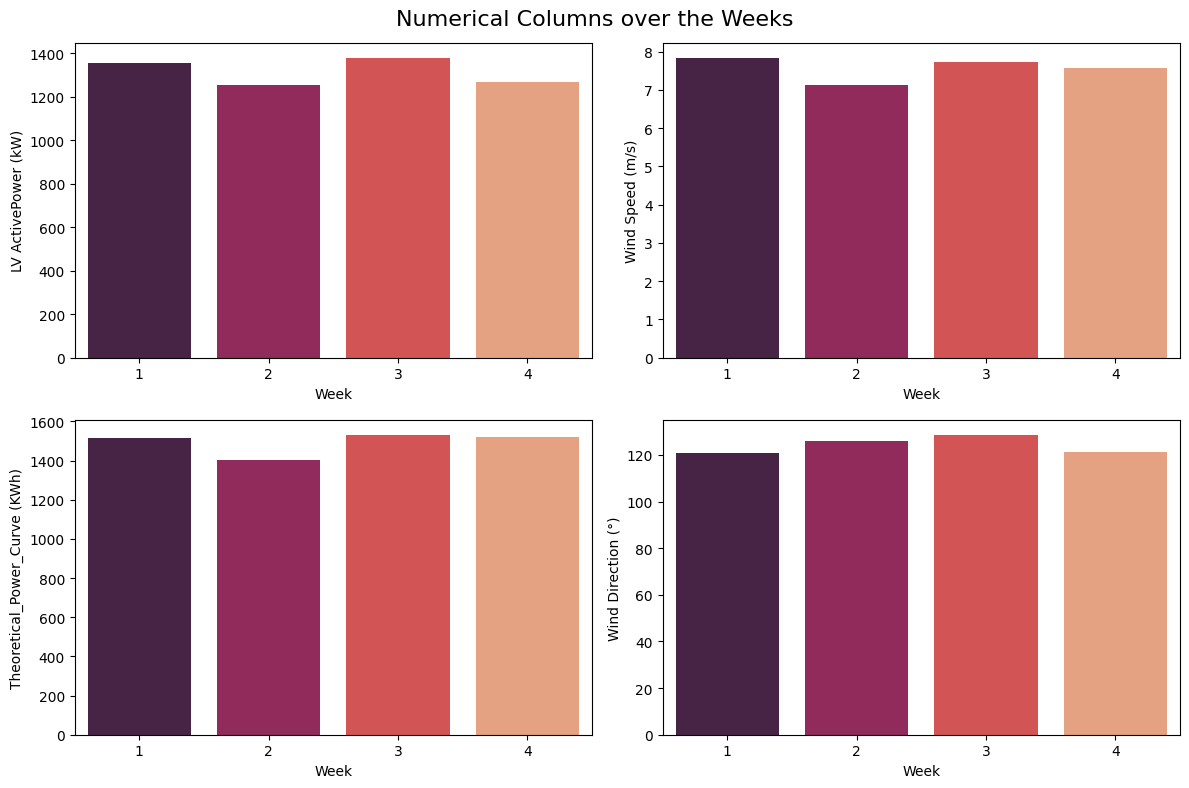

In [22]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Week'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Weeks', fontsize=16)
plt.tight_layout()
plt.show() 

<h3>Numerical Columns for each Month<h3>

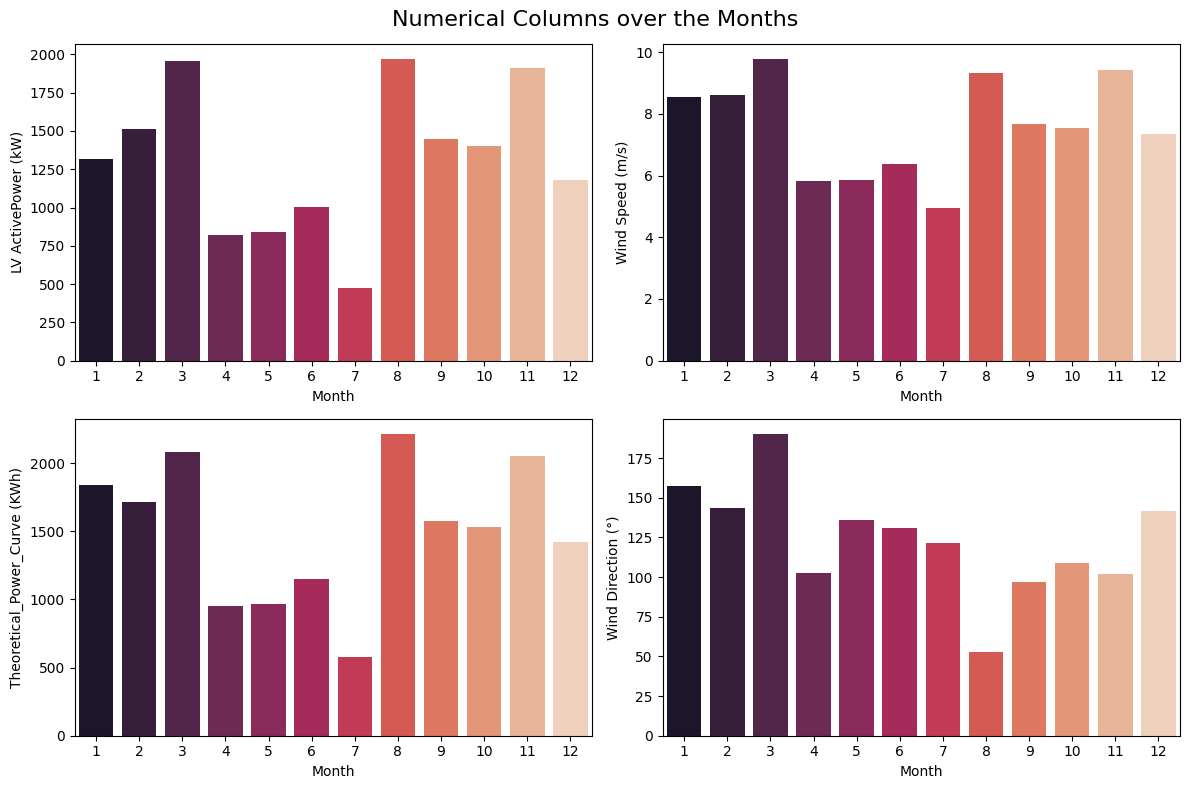

In [23]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=df_train['Month'],y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Months', fontsize=16)
plt.tight_layout()
plt.show() 

<h3>Numerical Columns over the Seasons</h3>

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

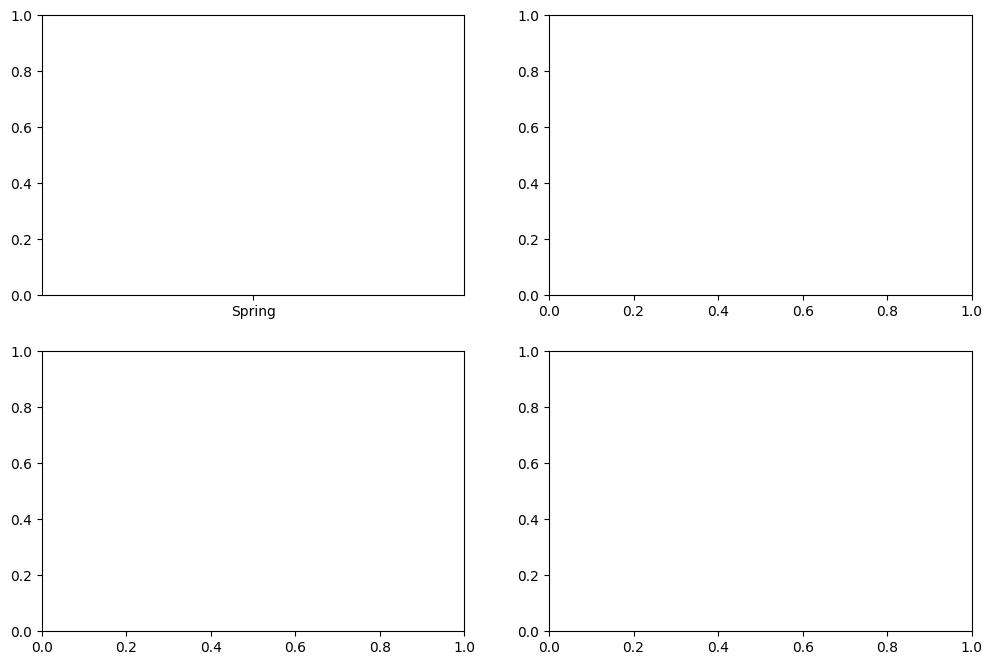

In [24]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(df_train[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=df_train[col],data=df_train,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show() 

<a name="4"></a>
# 4 - Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Count    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    # print("Outliers percentage:", len(outliers)#/(dataframe[column].shape[0])*100,"%")
    print("Outliers Count :", len(outliers))
    print("-------------------------")   
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False
#Replace with IQR     
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  

for col in (num_col):
    outlier_percentage(df_train,col)

LV ActivePower (kW)

Outliers Count : 0

-------------------------

Wind Speed (m/s)

Outliers Count : 336

-------------------------

Theoretical_Power_Curve (KWh)

Outliers Count : 0

-------------------------

Wind Direction (°)

Outliers Count : 0

-------------------------


In [ ]:
for column in num_col:
    replace_with_threshholds(df_train,df_test,column)
    print(column,check_outliers(df_train,column))

LV ActivePower (kW) False

Wind Speed (m/s) False

Theoretical_Power_Curve (KWh) False

Wind Direction (°) False


<h3>Split the Target and Label Columns<h3>

In [ ]:
X_train,y_train,X_test,y_test=df_train.drop(columns='LV ActivePower (kW)'),df_train['LV ActivePower (kW)'],df_test.drop(columns='LV ActivePower (kW)'),df_test['LV ActivePower (kW)']


In [ ]:
print("The Shape of X_train is :",X_train.shape)
print("The Shape of y_train is :",y_train.shape)
print("The Shape of X_test is :",X_test.shape)
print("The Shape of y_test is :",y_test.shape)

The Shape of X_train is : (40424, 8)

The Shape of y_train is : (40424,)

The Shape of X_test is : (10106, 8)

The Shape of y_test is : (10106,)


<a name="4.1"></a>
## 4.1 - Pipeline

In [ ]:

num_col=['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)','Week','Month','Hour','Day']
cat_attribs=['Seasons']

In [ ]:
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OrdinalEncoder())
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_col),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [ ]:
X_train

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour
13791,2.799033,0.000000,179.881195,2,4,Spring,11,7
46267,4.963243,327.020704,123.176598,1,12,Winter,2,7
42105,12.740750,3592.761778,211.334000,4,10,Autumn,30,19
21123,7.094672,1059.182279,54.425968,1,6,Summer,1,10
11823,6.279566,722.431353,42.774040,4,3,Winter,28,15
...,...,...,...,...,...,...,...,...
11284,4.482124,218.225480,188.752899,4,3,Winter,24,21
44732,7.448900,1231.608058,174.903000,3,11,Autumn,21,15
38158,9.131682,2229.203981,63.853741,4,9,Autumn,28,15
860,12.322800,3563.456311,206.103394,1,1,Winter,7,3


In [ ]:
X_1=pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test=pd.DataFrame(preprocessing.transform(X_test))

In [ ]:
X_1

,0,1,2,3,4,5,6,7
0,-1.131041,-1.091661,0.600542,-0.539326,-0.738439,-0.800917,-0.533974,1.0
1,-0.616778,-0.852852,-0.007299,-1.414862,1.605546,-0.800917,-1.569184,3.0
2,1.231326,1.531968,0.937698,1.211745,1.019550,0.928508,1.651468,0.0
3,-0.110304,-0.318188,-0.744266,-1.414862,-0.152443,-0.368561,-1.684207,2.0
4,-0.303991,-0.564102,-0.869168,1.211745,-1.031437,0.352033,1.421421,3.0
...,...,...,...,...,...,...,...,...
40419,-0.731102,-0.932301,0.695641,1.211745,-1.031437,1.216745,0.961328,3.0
40420,-0.026132,-0.192274,0.547178,0.336210,1.312548,0.352033,0.616258,0.0
40421,0.373734,0.536225,-0.643206,1.211745,0.726552,0.352033,1.421421,0.0
40422,1.132012,1.510568,0.881629,-1.414862,-1.617433,-1.377392,-0.994067,3.0


<a name="5"></a>
# 5 - Feature Importance

In [ ]:
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_1,y_train,test_size=0.2,random_state=42)
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_train_1,y_train_1)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
1,Theoretical_Power_Curve (KWh),0.487188
0,Wind Speed (m/s),0.435565
2,Wind Direction (°),0.024236
6,Day,0.021445
4,Month,0.017954
5,Seasons,0.008131
3,Week,0.003757
7,Hour,0.001725


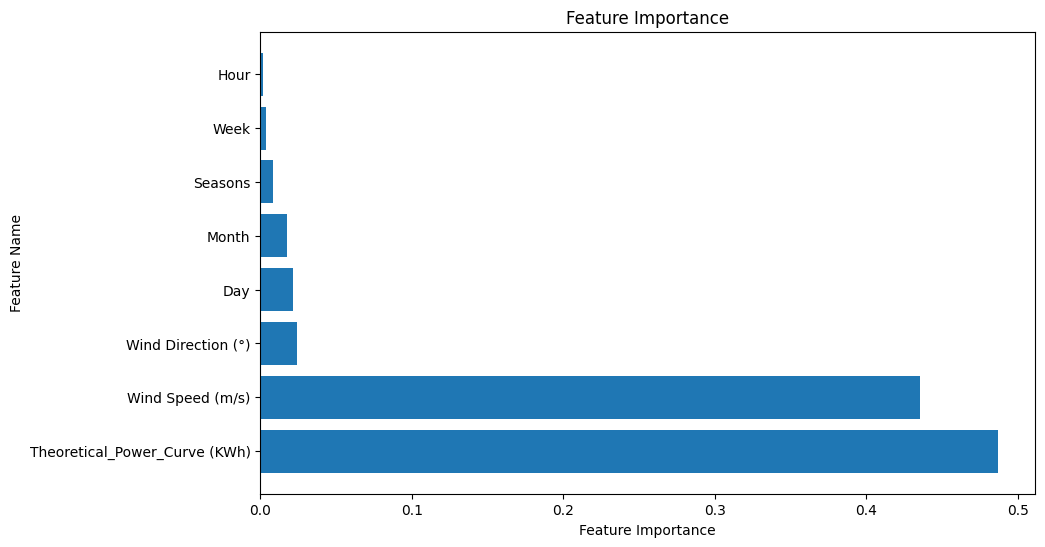

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

<a name="6"></a>
# 6 - Modeling

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_1 , y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [ ]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
#models_df=models_df.sort_values("R2_score", ascending = False)

In [ ]:
models_df

,Model-Name,R2_score,RMSE
0,GradientBoostingRegressor,94.646846,302.227414
1,SVR,88.929400,434.624875
2,RandomForestRegressor,97.319413,213.867095
3,LinearRegression,90.395802,404.817746
4,ExtraTreesRegressor,97.667454,199.500571
5,AdaBoostRegressor,86.214716,484.994543
6,DecisionTreeRegressor,95.247386,284.770665
7,XGBRegressor,97.965704,186.309943
8,XGBRFRegressor,94.158605,315.709240


<a name="6.1"></a>
## 6.1 - Plot Model Scores

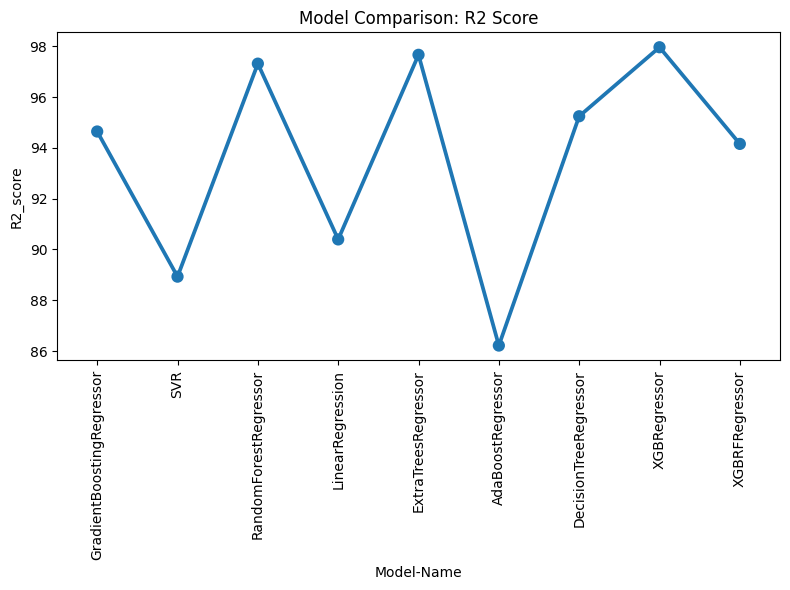

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

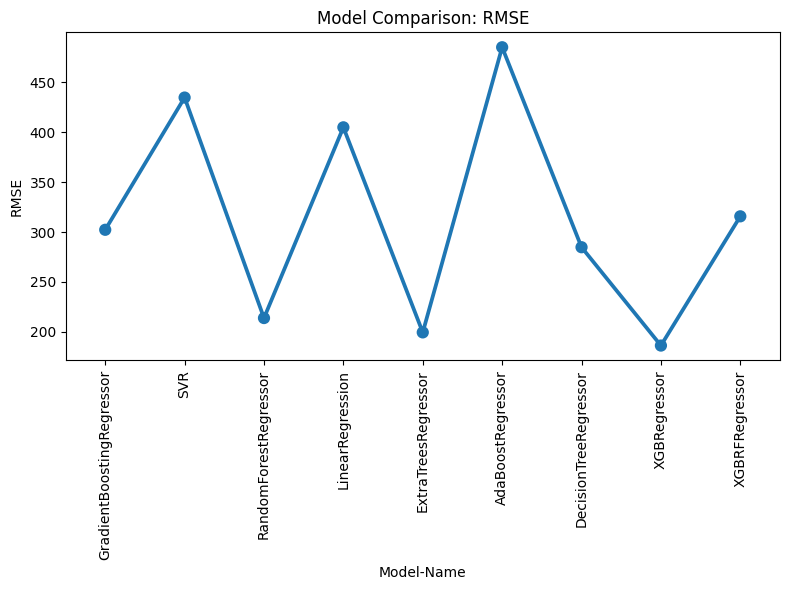

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

<a name="6.2"></a>
## 6.2 - Final Model

In [ ]:
fm=XGBRegressor(random_state=42)

<a name="6.3"></a>
## 6.3 - Fine-Tuning Final Model

In [ ]:
#Prepare a set of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [2, 3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4],
    #'booster': ['gbtree', 'gblinear'],
    'base_score': [0.25, 0.5, 0.75, 1]
}

In [ ]:
#Create the RandomizedSearchCV object and specify the number of folds for cross-validation
random_search = RandomizedSearchCV(estimator=fm, param_distributions=param_grid, n_iter=50, scoring='r2', n_jobs=-1)

In [ ]:
#Fit the RandmoizedSearch object to your training data:
random_search.fit(X_1, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   scoring='r2')

In [ ]:
#Inspect the best parameters and score:
best_params = random_search.best_params_
best_score = random_search.best_score_
print('Best Parameters: ', best_params)
print('Best R2: ', best_score)

Best Parameters:  {'n_estimators': 1500, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.15, 'base_score': 0.25}

Best R2:  0.9835904251623475


In [ ]:
#Use the best parameters to re-train your model and make predictions on the test data:
best_model = XGBRegressor(**best_params)
best_model.fit(X_1, y_train)
y_pred = best_model.predict(X_1_test)

In [ ]:
y_test1=y_test.to_numpy()

In [ ]:
#Evaluate the performance of the best model using your preferred metric
r2 = r2_score(y_test1, y_pred )
print('R2 Score: ', r2)

R2 Score:  0.983697134619831


<a name="6.4"></a>
## 6.4 - Cross-Validation Scores

In [ ]:
cross_val=cross_val_score(best_model,X_1_test,y_test,scoring='r2',cv=20)
print(cross_val)

[0.96381274 0.97914429 0.98321757 0.98126317 0.97520795 0.96547654

 0.93943954 0.98002247 0.9790566  0.97586496 0.97416224 0.971028

 0.9708857  0.97694609 0.97378769 0.98327627 0.97498478 0.97758577

 0.97237845 0.95377373]


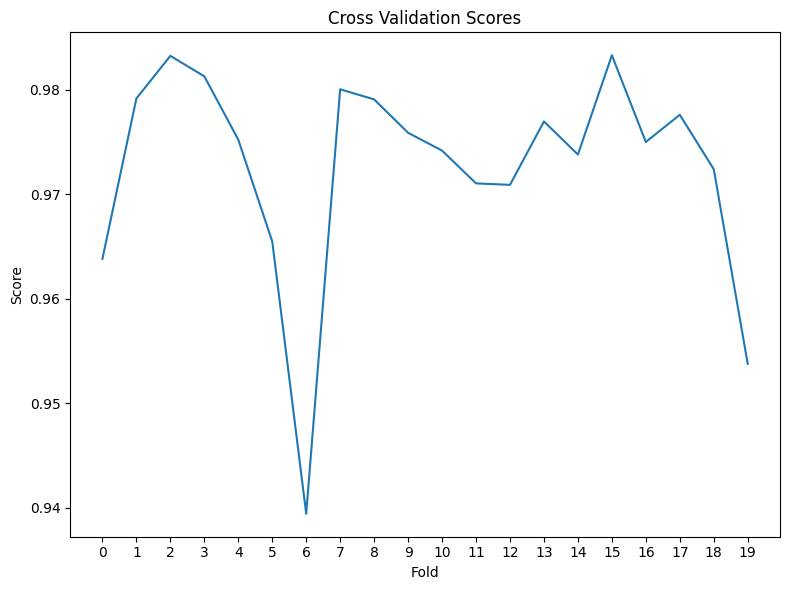

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()

In [ ]:
print(cross_val.max())

0.983276270717635


In [ ]:
data_new = pd.DataFrame({'LV ActivePower (kW)': y_test})
data_new['Predictions'] = y_pred
data_new["Theoretical_Power_Curve (KWh)"] = df["Theoretical_Power_Curve (KWh)"]

data_new.head()

,LV ActivePower (kW),Predictions,Theoretical_Power_Curve (KWh)
8057,3348.910889,3177.929932,3452.918718
8059,2647.506104,2680.365234,2989.120313
50250,0.000000,84.376968,779.117347
14774,1334.573975,1317.467896,1502.728868
49374,533.002808,514.107605,593.890170


<a name="7"></a>
## 7 - Plot Predicted/Real/Theoritical Power

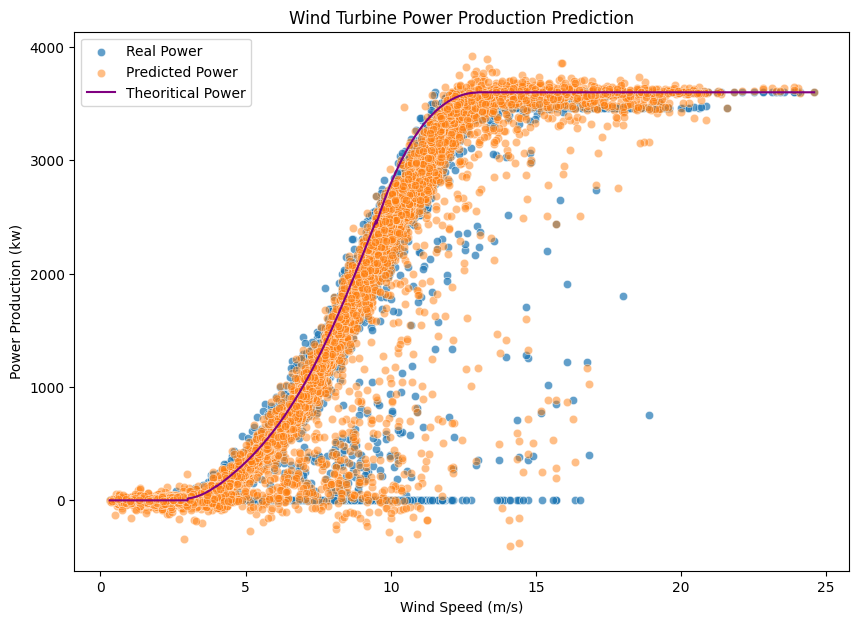

In [ ]:
# Visualizing real, theoritical and predicted power production
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=data_new['LV ActivePower (kW)'],alpha=0.7, label= 'Real Power')
sns.scatterplot(x=df['Wind Speed (m/s)'], y=data_new['Predictions'], alpha=0.5, label='Predicted Power', marker='o')
sns.lineplot(x=df['Wind Speed (m/s)'], y=data_new["Theoretical_Power_Curve (KWh)"], label='Theoritical Power',color='purple')
plt.title('Wind Turbine Power Production Prediction')
plt.ylabel('Power Production (kw)')
plt.legend()

the model fits better to the `real power` production, than the `theoritical power` production curve.